In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
sys.path.append('/home/manu/TFG_repo/scripts')  # make modules in scripts folder callable from notebooks

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from mpl_toolkits.axes_grid1 import make_axes_locatable
import xarray as xr
from scipy.io import loadmat
from datetime import datetime, timedelta
sys.path.append('/home/manu/TFG_repo/scripts')

In [3]:
from analysis_routines import *
from config import data_dir, reports_dir
from plotting_routines_xr import *
from processing_routines import datenum_to_epoch
from wavelet_analysis import wavelet_power_spectrum
from harmonic_analysis import *
from scipy.stats import chi2
from statsmodels.tsa.stattools import acf, adfuller, ccf, ccovf
plt.style.use('/home/manu/TFG_repo/notebooks/mplstyles/report.mplstyle')

In [40]:
def dummy_thermocline(x, a1, mld, k):
    pos = np.where(x >= mld, 1.0, 0.0)    
    # chech if exponent is inside limits

    return a1 + pos * 3*( np.exp(-k * (x - mld)) -1 + -0.002442*(x - mld))


In [28]:
xx = np.arange(0, 176, 0.5)
x = np.array([  1,   8,  23,  28,  33,  43,  48,  53,  63,  78,  96, 108, 126, 151,
       176, 201])

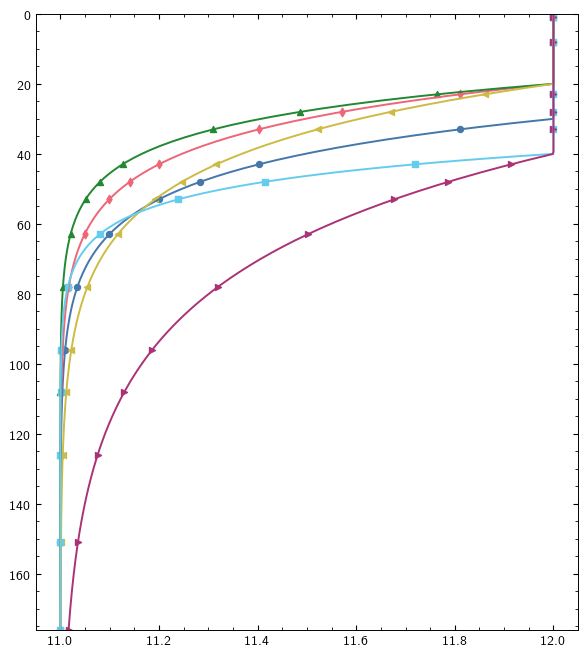

In [6]:
fig, ax = plt.subplots(figsize=(7, 8))
ax.plot(dummy_thermocline(xx, 12, 30, 0.07), xx)
ax.plot(dummy_thermocline(xx, 12, 20, 0.07), xx)
ax.plot(dummy_thermocline(xx, 12, 20, 0.07+0.02), xx)
ax.plot(dummy_thermocline(xx, 12, 20, 0.07-0.02), xx)
ax.plot(dummy_thermocline(xx, 12, 40, 0.07+0.04), xx)
ax.plot(dummy_thermocline(xx, 12, 40, 0.07-0.04), xx)


ax.scatter(dummy_thermocline(x, 12, 30, 0.07), x)
ax.scatter(dummy_thermocline(x, 12, 20, 0.07), x, marker='d')
ax.scatter(dummy_thermocline(x, 12, 20, 0.07+0.02), x, marker='^')
ax.scatter(dummy_thermocline(x, 12, 20, 0.07-0.02), x, marker='<')
ax.scatter(dummy_thermocline(x, 12, 40, 0.07+0.04), x, marker='s')
ax.scatter(dummy_thermocline(x, 12, 40, 0.07-0.04), x, marker='>')


ax.set_ylim(176, 0)

plt.show()

(200.0, 0.0)

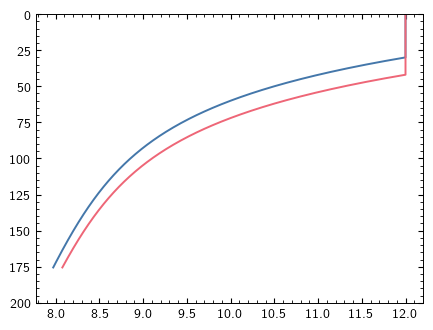

In [44]:
low = dummy_thermocline(xx, 12, 30, 0.03)
high = np.zeros_like(low)
high[24:] = low[:-24]
high[:25] = low[0]
plt.plot(low, xx)
plt.plot(high, xx)
plt.ylim(200, 0)

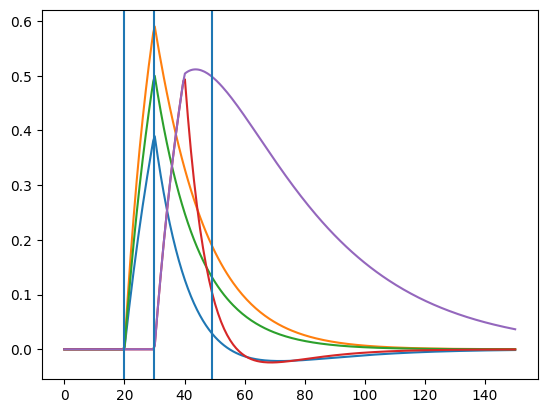

In [166]:
fig, ax = plt.subplots()
ax.plot(xx, dummy_thermocline(xx, 12, 30, 0.07) - dummy_thermocline(xx, 12, 20, 0.07-0.02))
ax.plot(xx, dummy_thermocline(xx, 12, 30, 0.07) - dummy_thermocline(xx, 12, 20, 0.07+0.02))
ax.plot(xx, dummy_thermocline(xx, 12, 30, 0.07) - dummy_thermocline(xx, 12, 20, 0.07))


ax.plot(xx, - dummy_thermocline(xx, 12, 30, 0.07) + dummy_thermocline(xx, 12, 40, 0.07+0.04))
ax.plot(xx, - dummy_thermocline(xx, 12, 30, 0.07) + dummy_thermocline(xx, 12, 40, 0.07-0.04))
ax.axvline(20)
ax.axvline(30)
ax.axvline(49)

plt.show()

In [ ]:
fig, ax = plt.subplots(figsize=(5, 6))
ax.plot(dummy_thermocline(xx, 12, 30, 0.07), xx)
ax.plot(dummy_thermocline(xx, 12, 20, 0.07), xx)
ax.plot(dummy_thermocline(xx, 12, 20, 0.07+0.02), xx)
ax.plot(dummy_thermocline(xx, 12, 20, 0.07-0.01), xx)
ax.scatter(dummy_thermocline(x, 12, 30, 0.07), x)
ax.scatter(dummy_thermocline(x, 12, 20, 0.07), x)
ax.scatter(dummy_thermocline(x, 12, 20, 0.07+0.02), x)
ax.scatter(dummy_thermocline(x, 12, 20, 0.07-0.01), x)
ax.set_ylim(176, 0)

plt.show()

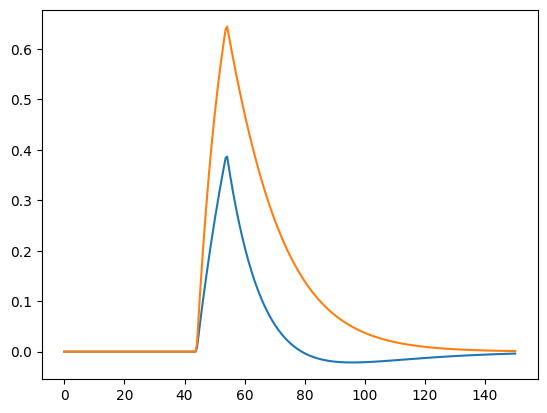

In [124]:
fig, ax = plt.subplots()
ax.plot(xx, dummy_thermocline(xx, 12, 54, 0.07) - dummy_thermocline(xx, 12, 44, 0.06-0.01))
ax.plot(xx, dummy_thermocline(xx, 12, 54, 0.07) - dummy_thermocline(xx, 12, 44, 0.065+0.04))
plt.show()

In [11]:
test = load_SHDR_fit('SHDR_trials/pres-1.csv')
temp, depth, date = load_time_series('test/test_spring_short.nc')

In [18]:
test_series = load_time_series_xr('processed/AGL_20181116_chain_xrcompatible.nc')

In [24]:
test_series = test_series.sel(date=slice(date[0], date[-1]))

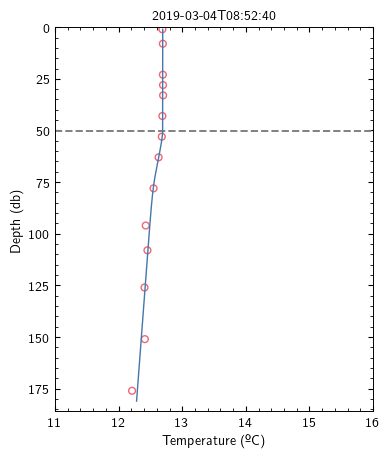

In [30]:
plot_profile_fit(test, test_series, 3500)

In [34]:
np.log(2)

0.6931471805599453

In [33]:
np.exp(-2) - np.exp(-3)

0.08554821486874875

In [37]:
np.log(0.02/0.04)/(0.02-0.04)

34.657359027997266